# Library Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(style="whitegrid")

# Importing DATASET/Loading to Pandas Dataframe

In [3]:
df = pd.read_csv("Sample - Superstore.csv", encoding = 'latin1')

# Exploring DataFrame for any Errors

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.shape

(9994, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

# Date Conversion to DataFrame format for ANALYSIS

In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.month_name()


# Summary of SALES

In [10]:
print("Total Sales: ",df["Sales"].sum())
print("Total Profit: ",df["Profit"].sum())
print("Total Order: ",df["Order ID"].nunique())

Total Sales:  2297200.8603
Total Profit:  286397.0217
Total Order:  5009


# Monthly Sales Trend Graph

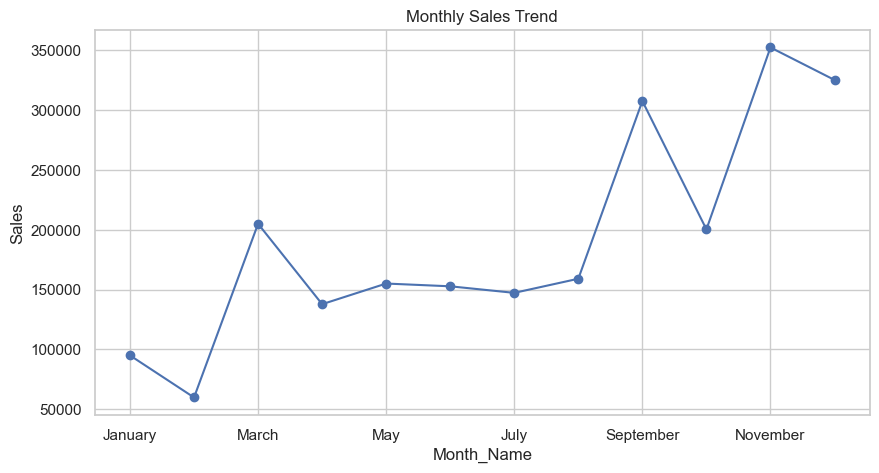

In [11]:
monthly_sales = df.groupby('Month_Name')['Sales'].sum()
monthly_sales = monthly_sales.reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])

plt.figure(figsize=(10,5))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.show()

# Sales and Profit By Category Graph

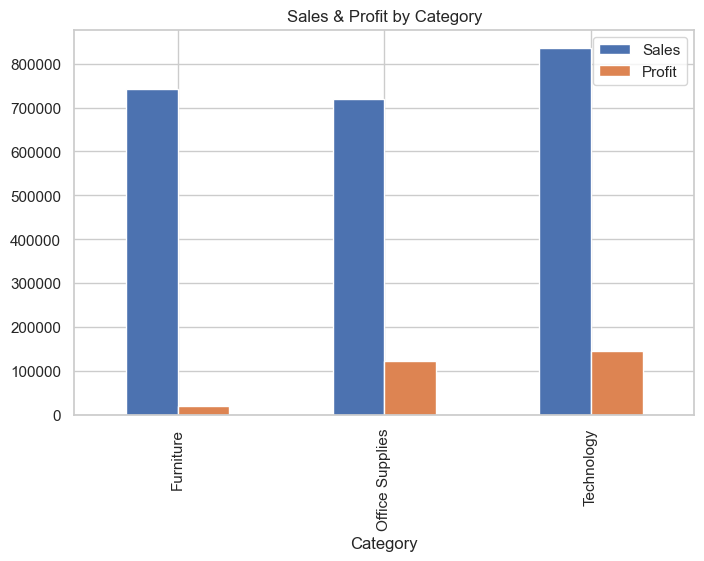

In [12]:
category_data = df.groupby('Category')[['Sales','Profit']].sum()

category_data.plot(kind='bar', figsize=(8,5))
plt.title("Sales & Profit by Category")
plt.show()

# Sub-Category Analysis Graph

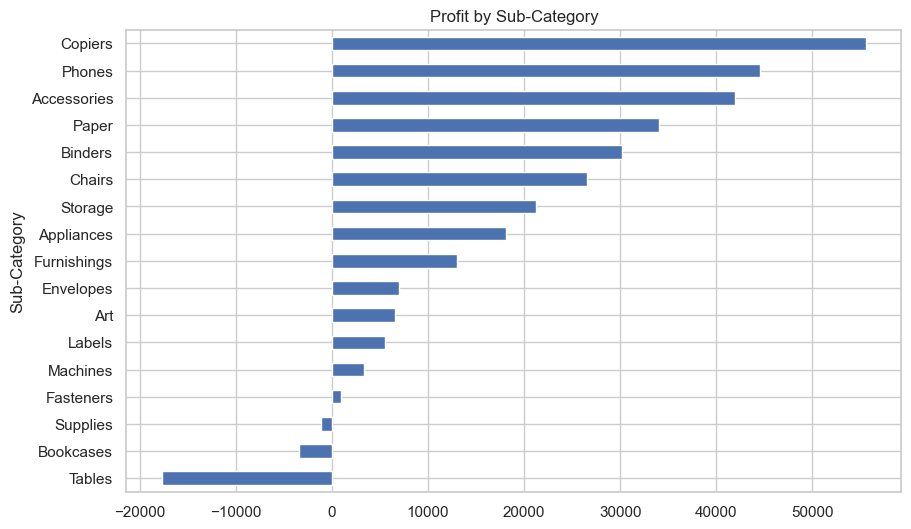

In [13]:
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()

plt.figure(figsize=(10,6))
subcat_profit.plot(kind='barh')
plt.title("Profit by Sub-Category")
plt.show()

# Region-Wise Sales & Profit Graph

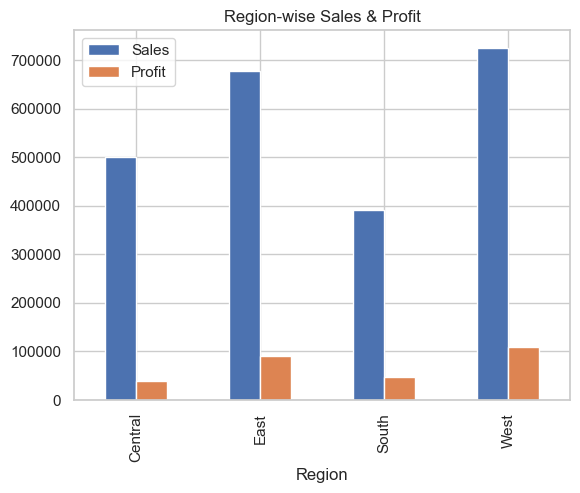

In [14]:
region_sales = df.groupby('Region')[['Sales','Profit']].sum()
region_sales.plot(kind='bar')
plt.title("Region-wise Sales & Profit")
plt.show()

# Profit VS Discount Analysis Graph

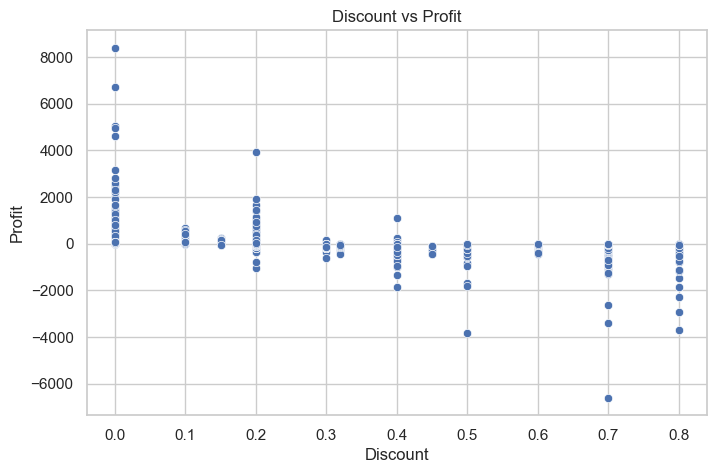

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title("Discount vs Profit")
plt.show()

# Top Performing Products Analysis and Visual Graph 
(Based on Sales & Profit)

In [16]:
top_sales = (
    df.groupby('Product Name')['Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

top_sales

,Product Name,Sales
0,Canon imageCLASS 2200 Advanced Copier,61599.824
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
2,Cisco TelePresence System EX90 Videoconferenci...,22638.480
3,HON 5400 Series Task Chairs for Big and Tall,21870.576
4,GBC DocuBind TL300 Electric Binding System,19823.479
5,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
6,Hewlett Packard LaserJet 3310 Copier,18839.686
7,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
8,GBC DocuBind P400 Electric Binding System,17965.068
9,High Speed Automatic Electric Letter Opener,17030.312


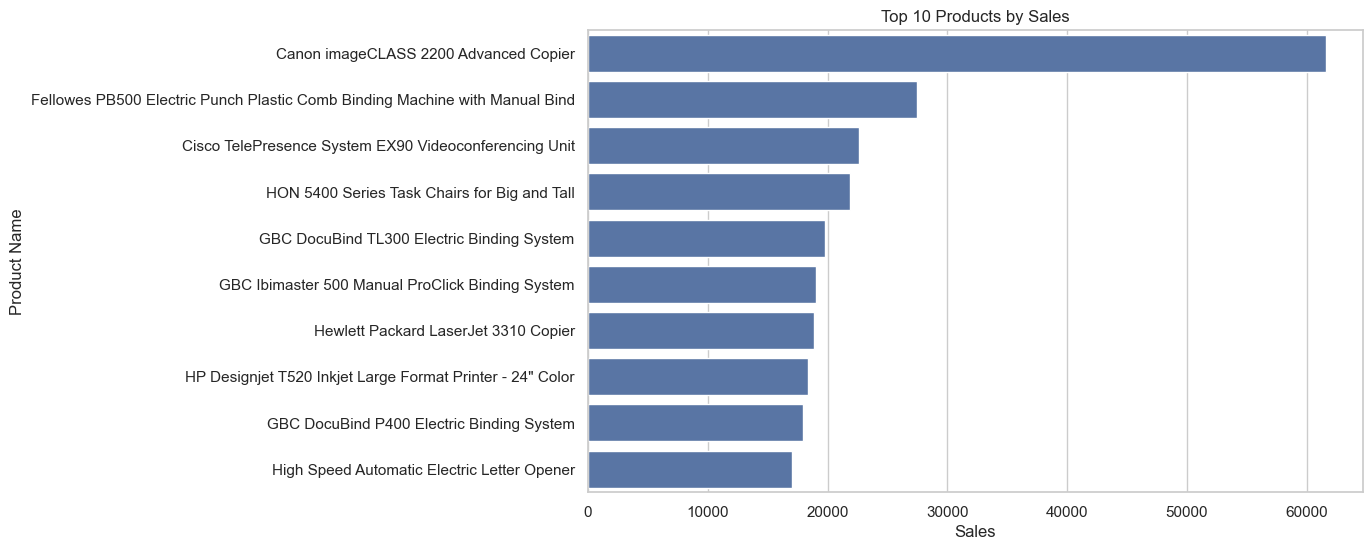

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x='Sales', y='Product Name', data=top_sales)
plt.title("Top 10 Products by Sales")
plt.show()

In [18]:
top_profit = (
    df.groupby('Product Name')['Profit']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

top_profit

,Product Name,Profit
0,Canon imageCLASS 2200 Advanced Copier,25199.9280
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.0390
2,Hewlett Packard LaserJet 3310 Copier,6983.8836
3,Canon PC1060 Personal Laser Copier,4570.9347
4,HP Designjet T520 Inkjet Large Format Printer ...,4094.9766
5,Ativa V4110MDD Micro-Cut Shredder,3772.9461
6,"3D Systems Cube Printer, 2nd Generation, Magenta",3717.9714
7,Plantronics Savi W720 Multi-Device Wireless He...,3696.2820
8,Ibico EPK-21 Electric Binding System,3345.2823
9,Zebra ZM400 Thermal Label Printer,3343.5360


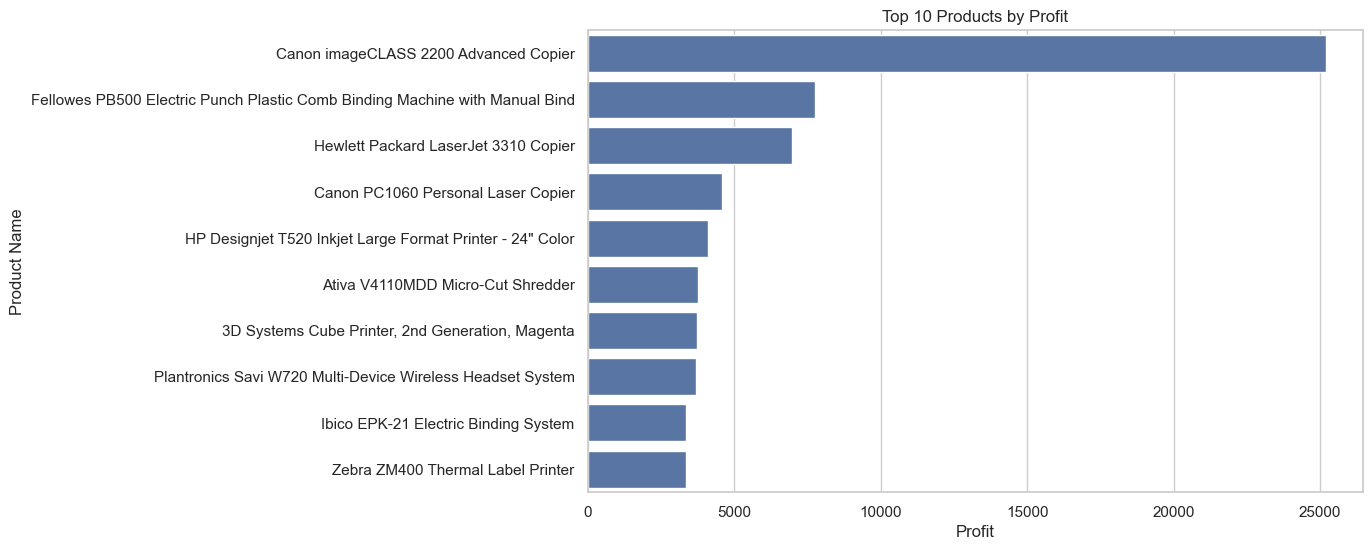

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x='Profit', y='Product Name', data=top_profit)
plt.title("Top 10 Products by Profit")
plt.show()

# Loss Inducing Products Analysis and Visual Graph
(Based on Sales & Loss)

In [20]:
bottom_sales = (
    df.groupby('Product Name')['Sales']
    .sum()
    .sort_values()
    .head(10)
    .reset_index()
)

bottom_sales

,Product Name,Sales
0,Eureka Disposable Bags for Sanitaire Vibra Gro...,1.624
1,Avery 5,5.760
2,Xerox 20,6.480
3,Grip Seal Envelopes,7.072
4,Avery Hi-Liter Pen Style Six-Color Fluorescent...,7.700
5,Avery Hi-Liter Comfort Grip Fluorescent Highli...,7.800
6,Xerox 1989,7.968
7,4009 Highlighters,8.040
8,Stockwell Gold Paper Clips,8.096
9,Newell 308,8.400


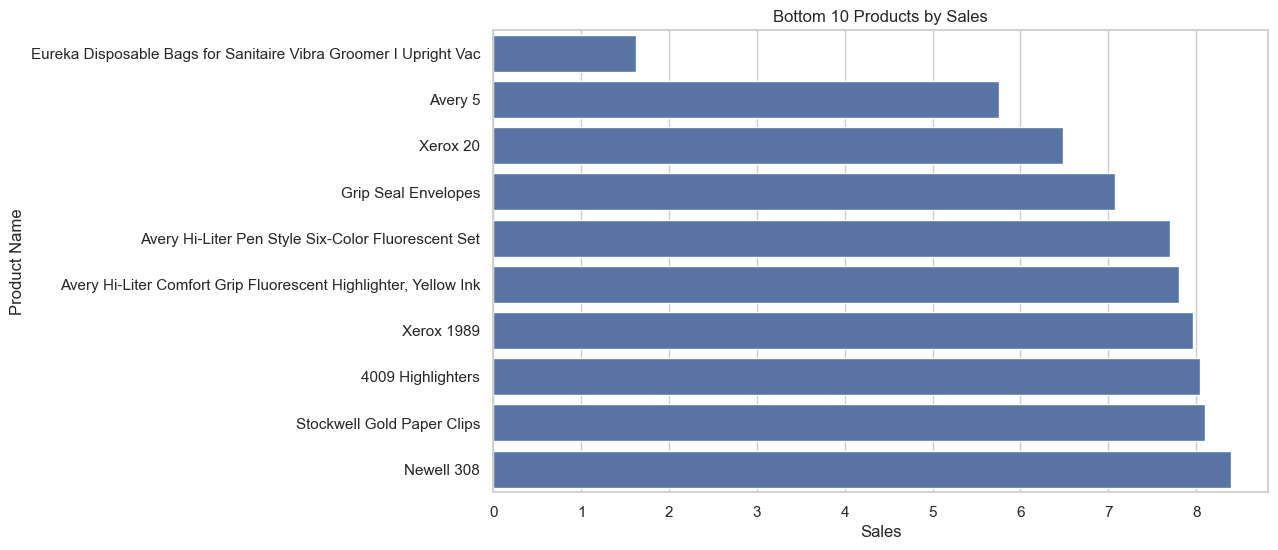

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x='Sales', y='Product Name', data=bottom_sales)
plt.title("Bottom 10 Products by Sales")
plt.show()

In [22]:
bottom_profit = (
    df.groupby('Product Name')['Profit']
    .sum()
    .sort_values()
    .head(10)
    .reset_index()
)

bottom_profit

,Product Name,Profit
0,Cubify CubeX 3D Printer Double Head Print,-8879.9704
1,Lexmark MX611dhe Monochrome Laser Printer,-4589.9730
2,Cubify CubeX 3D Printer Triple Head Print,-3839.9904
3,Chromcraft Bull-Nose Wood Oval Conference Tabl...,-2876.1156
4,Bush Advantage Collection Racetrack Conference...,-1934.3976
5,GBC DocuBind P400 Electric Binding System,-1878.1662
6,Cisco TelePresence System EX90 Videoconferenci...,-1811.0784
7,Martin Yale Chadless Opener Electric Letter Op...,-1299.1836
8,Balt Solid Wood Round Tables,-1201.0581
9,BoxOffice By Design Rectangular and Half-Moon ...,-1148.4375


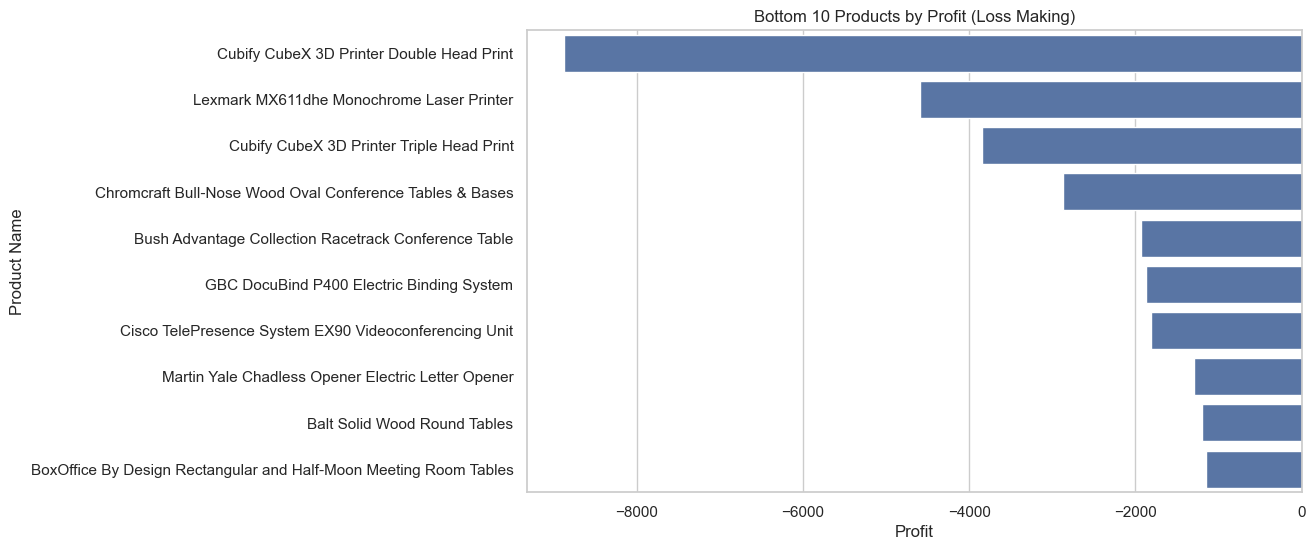

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x='Profit', y='Product Name', data=bottom_profit)
plt.title("Bottom 10 Products by Profit (Loss Making)")
plt.show()

# Overall Profit Margin

In [24]:
df['Profit_Margin'] = df['Profit'] / df['Sales']
df['Profit_Margin'].describe()

count    9994.000000
mean        0.120314
std         0.466754
min        -2.750000
25%         0.075000
50%         0.270000
75%         0.362500
max         0.500000
Name: Profit_Margin, dtype: float64